In [1]:
import numpy as np
import pandas as pd



In [2]:
!pip install autoimpute

     |████████████████████████████████| 100 kB 9.7 MB/s 


In [3]:
from autoimpute.imputations import SingleImputer, MultipleImputer, MiceImputer


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Omdena Fresh water/Data Imputation/final_data_without_imputation.csv')

In [5]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df.corr(method=histogram_intersection)

,year,population_total,agricultural_land_sq_km,animals_production_head,cereal_yield_kg_per_hectare,co2_emissions_kt,transpiration_sum,evaporation_sum,eti_sum,npp_sum,ret_sum,gwp_mean,renewable_internal_freshwater_resources_per_capita_cubic_meters,land_area_equipped_for_irrigation_ha,water_use_efficiency_united_states_dollars_per_cubic_meter,level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources,methane_emissions_kt_of_co2_equivalent,nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent,climatic_water_deficit_annual_kg_m2,potential_evapotranspiration_annual_kg_m2,wapor_gross_water_productivity_annual_kg_m3,wapor_net_primary_production_annual_g_m2,wapor_reference_evapotranspiration_annual_mm,freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y,_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y,_manufacturing_isic_10_33_mio_m3_y,rainfall_mm,mintemp_c,maxtemp_c,cereal_crops_production_ton,cereal_crops_yield_hg_ha,harvested_area_of_cereal_crops_ha,nile
year,1.0,1.213900e+05,115391.0,1.174100e+05,115391.0,117351.0,604.9,491.3,957.4,23.9,24174.0,0.6,241.6,115391.0,64.8,2180.1,97706.0,97706.0,1340.8,1614.7,0.6,2.0,24174.0,26117.0,34136.0,24405.0,82.5,471.9,909.8,117410.0,117410.0,117410.0,9561.0
population_total,121390.0,1.000000e+00,1755531.0,1.058095e+09,316444.0,5636751.3,604.9,491.3,957.4,23.9,29930.5,0.6,241.6,175156.0,64.8,2180.1,1807654.8,839879.4,1340.8,1614.7,0.6,2.0,29930.5,798648.0,929580.0,28008.0,82.5,471.9,909.8,972740243.0,15181328.0,142255488.0,9561.0
agricultural_land_sq_km,115391.0,1.755531e+06,1.0,1.755531e+06,316444.0,1691493.5,498.5,397.0,779.6,19.3,24961.0,0.5,241.6,175156.0,64.8,2180.1,1429495.0,839879.4,1206.4,1450.8,0.5,1.6,24961.0,469350.4,607218.0,28008.0,76.0,440.1,848.8,1755531.0,1755531.0,1755531.0,8746.0
animals_production_head,117410.0,1.058095e+09,1755531.0,1.000000e+00,316444.0,5620697.2,551.1,440.0,863.8,21.3,27477.8,0.6,241.6,175156.0,64.8,2180.1,1807654.8,839879.4,1271.4,1529.6,0.6,1.8,27477.8,798648.0,929580.0,28008.0,79.2,456.0,879.4,919038424.0,15181328.0,142255488.0,8746.0
cereal_yield_kg_per_hectare,115391.0,3.164440e+05,316444.0,3.164440e+05,1.0,316444.0,498.5,397.0,779.6,19.3,24961.0,0.5,241.6,175156.0,64.8,2180.1,285393.7,285393.7,1206.4,1450.8,0.5,1.6,24961.0,94644.9,123718.9,28008.0,76.0,440.1,848.8,316444.0,316444.0,316444.0,8746.0
co2_emissions_kt,117351.0,5.636751e+06,1691493.5,5.620697e+06,316444.0,1.0,498.5,397.0,779.6,19.3,24961.0,0.5,241.6,175156.0,64.8,2180.1,1807654.8,839879.4,1206.4,1450.8,0.5,1.6,24961.0,798648.0,929580.0,28008.0,76.0,440.1,848.8,5620697.2,5620697.2,5620697.2,9561.0
transpiration_sum,604.9,6.049000e+02,498.5,5.511000e+02,498.5,498.5,1.0,491.3,604.9,23.9,604.9,0.6,21.9,498.5,40.8,498.5,498.5,498.5,604.9,604.9,0.6,2.0,604.9,344.8,395.5,395.5,32.6,193.3,369.2,551.1,551.1,551.1,NaN
evaporation_sum,491.3,4.913000e+02,397.0,4.400000e+02,397.0,397.0,491.3,1.0,491.3,23.9,491.3,0.6,21.9,397.0,40.8,397.0,397.0,397.0,491.3,491.3,0.6,2.0,491.3,264.7,305.1,305.1,32.6,193.3,369.2,440.0,440.0,440.0,NaN
eti_sum,957.4,9.574000e+02,779.6,8.638000e+02,779.6,779.6,604.9,491.3,1.0,23.9,957.4,0.6,21.9,779.6,40.8,779.6,779.6,779.6,811.2,932.3,0.6,2.0,957.4,527.8,607.6,607.6,32.6,193.3,369.2,863.8,863.8,863.8,NaN
npp_sum,23.9,2.390000e+01,19.3,2.130000e+01,19.3,19.3,23.9,23.9,23.9,1.0,23.9,0.6,3.8,19.3,19.3,19.3,19.3,19.3,23.9,23.9,0.6,2.0,23.9,13.6,15.5,15.5,23.7,23.9,23.9,21.3,21.3,21.3,NaN


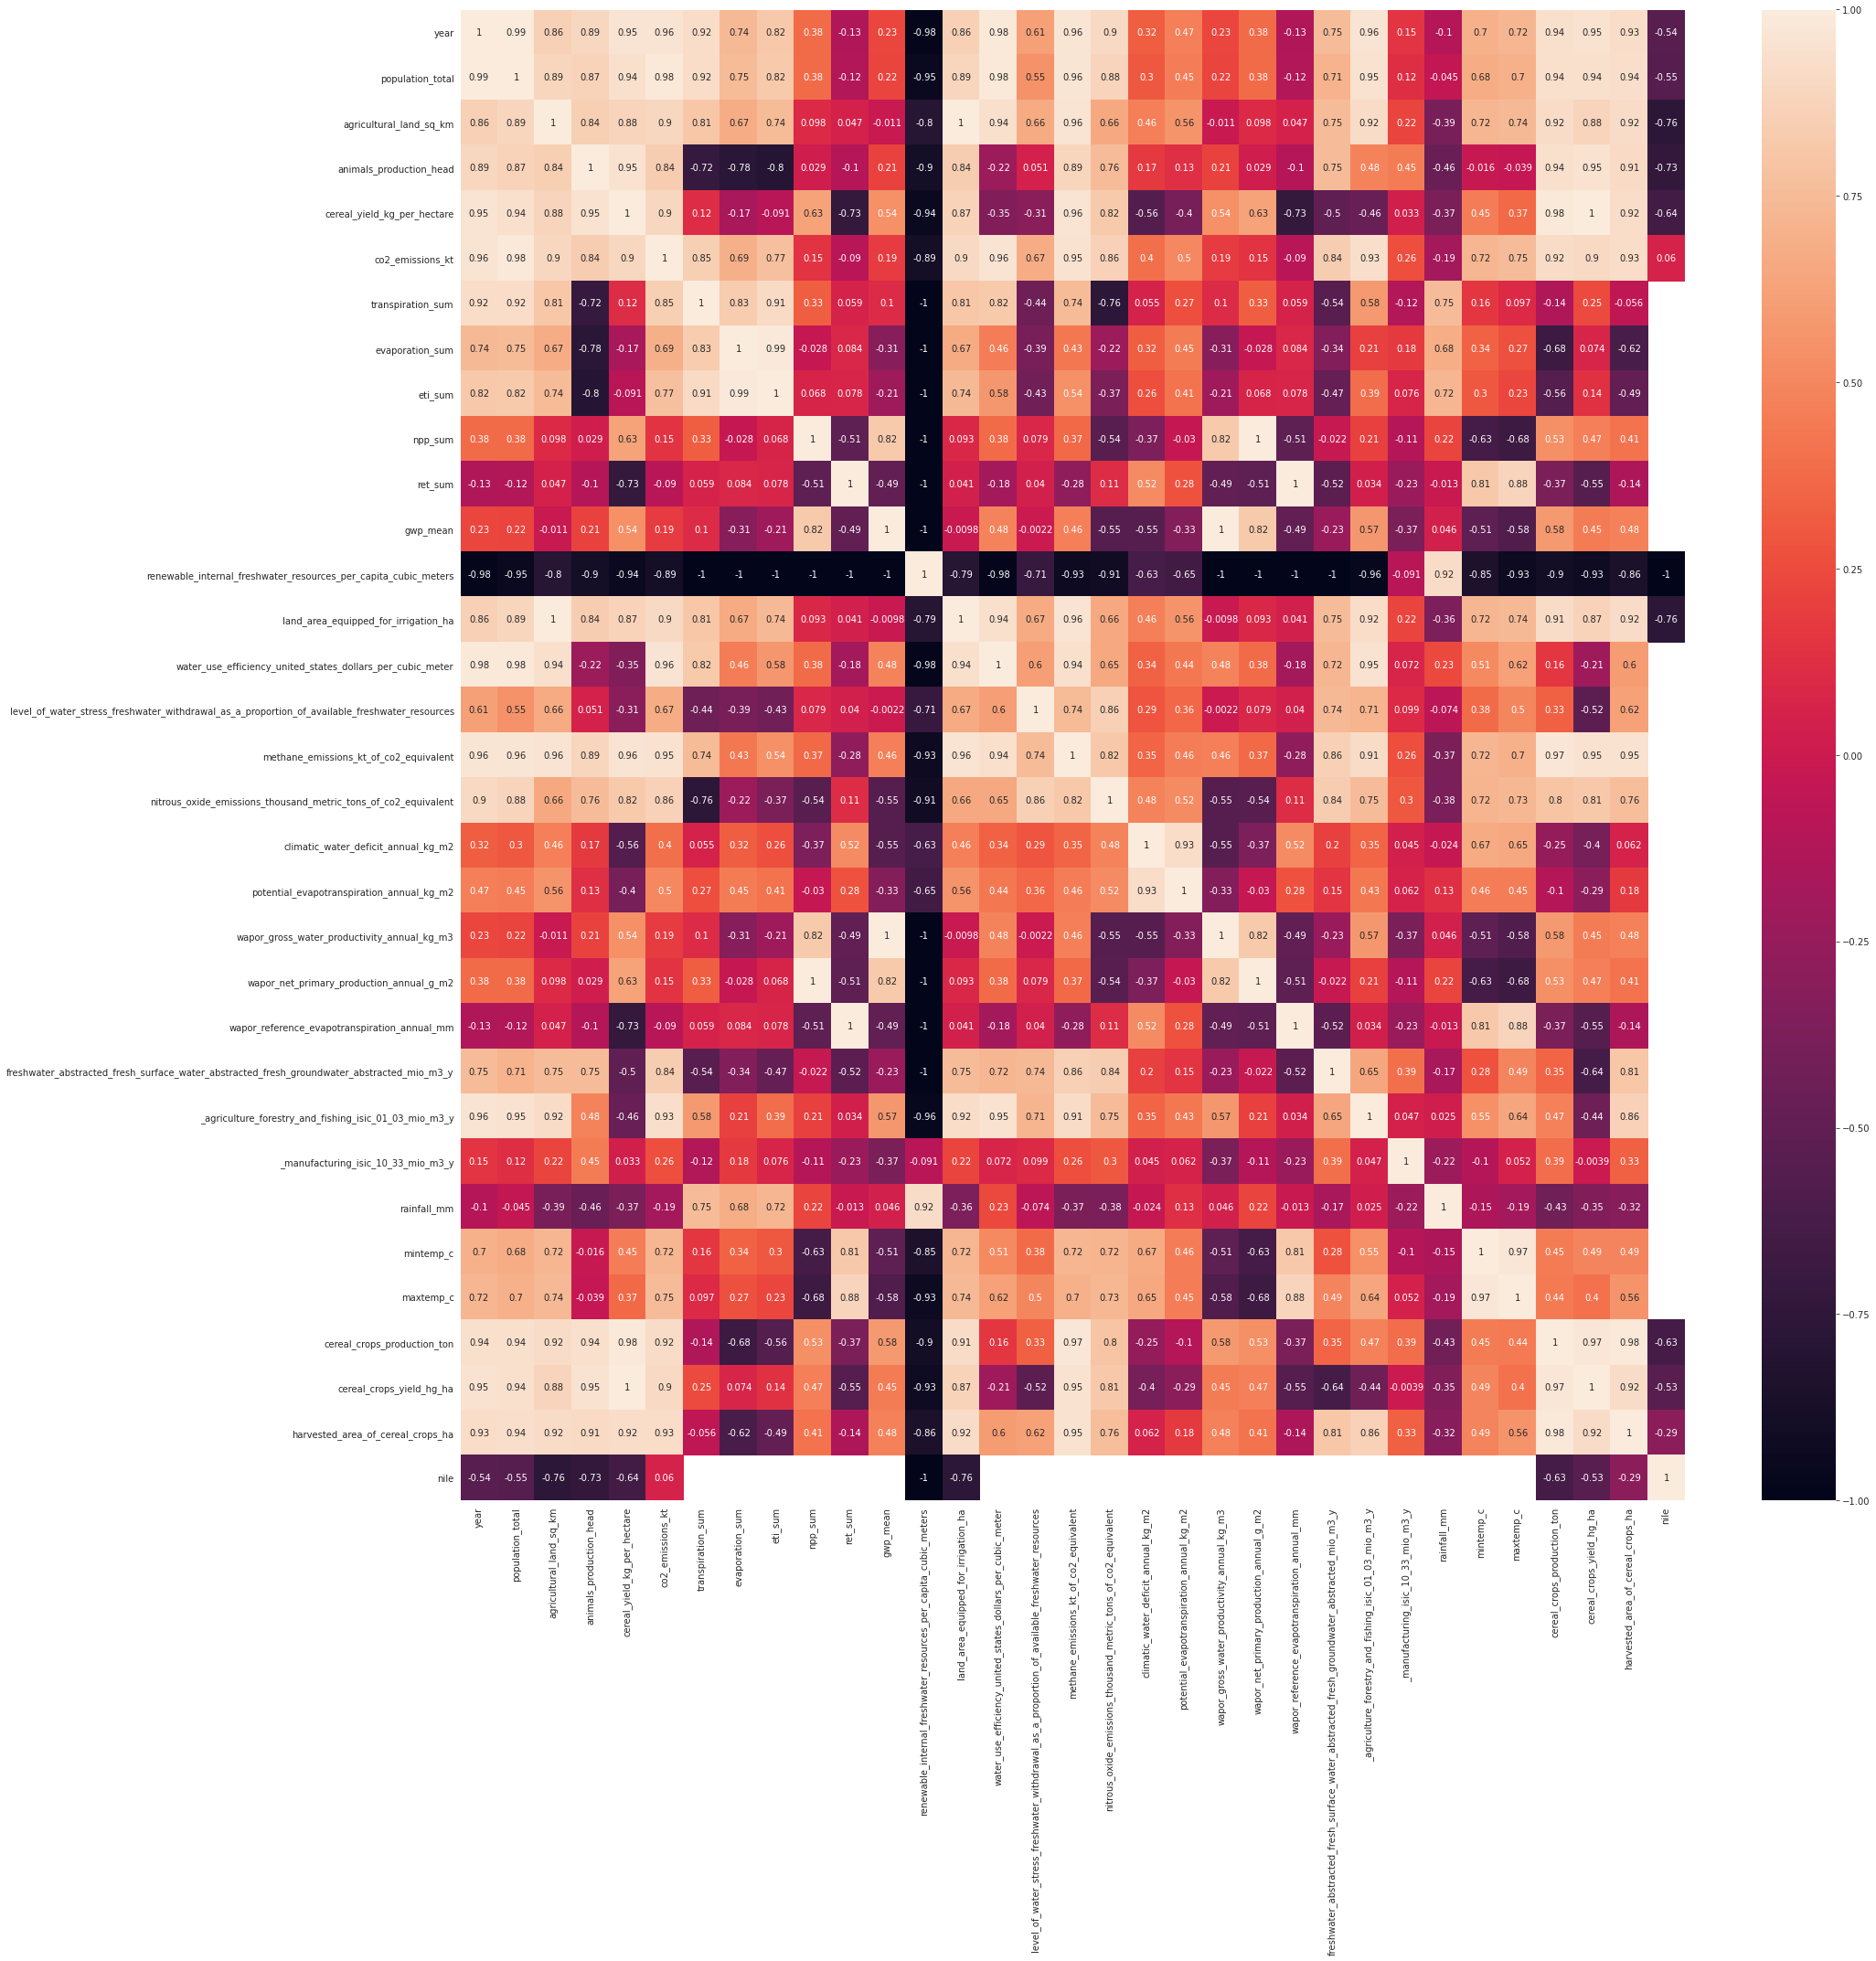

In [8]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(30,30)) 
Var_Corr=df.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax=ax)


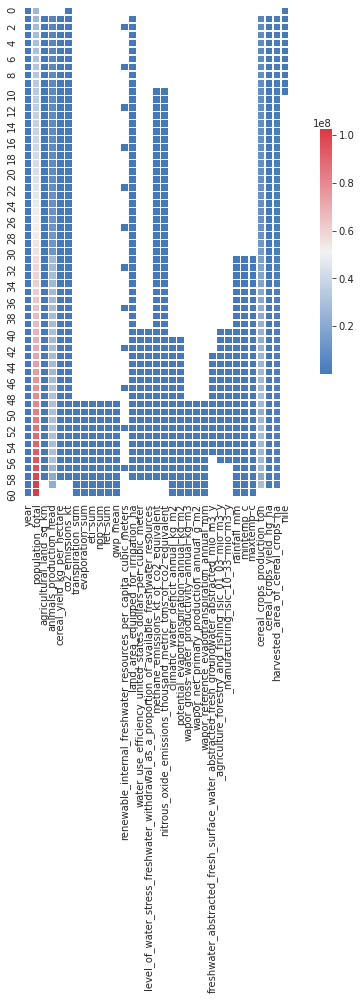

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)

In [9]:
df.columns

Index(['year', 'population_total', 'agricultural_land_sq_km',
       'animals_production_head', 'cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'transpiration_sum', 'evaporation_sum', 'eti_sum',
       'npp_sum', 'ret_sum', 'gwp_mean',
       'renewable_internal_freshwater_resources_per_capita_cubic_meters',
       'land_area_equipped_for_irrigation_ha',
       'water_use_efficiency_united_states_dollars_per_cubic_meter',
       'level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'climatic_water_deficit_annual_kg_m2',
       'potential_evapotranspiration_annual_kg_m2',
       'wapor_gross_water_productivity_annual_kg_m3',
       'wapor_net_primary_production_annual_g_m2',
       'wapor_reference_evapotranspiration_annual_mm',
       'freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_a

In [10]:
df.isna().any()

year                                                                                             False
population_total                                                                                 False
agricultural_land_sq_km                                                                           True
animals_production_head                                                                           True
cereal_yield_kg_per_hectare                                                                       True
co2_emissions_kt                                                                                  True
transpiration_sum                                                                                 True
evaporation_sum                                                                                   True
eti_sum                                                                                           True
npp_sum                                                                  

In [13]:
df.head(60)

,year,population_total,agricultural_land_sq_km,animals_production_head,cereal_yield_kg_per_hectare,co2_emissions_kt,transpiration_sum,evaporation_sum,eti_sum,npp_sum,ret_sum,gwp_mean,renewable_internal_freshwater_resources_per_capita_cubic_meters,land_area_equipped_for_irrigation_ha,water_use_efficiency_united_states_dollars_per_cubic_meter,level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources,methane_emissions_kt_of_co2_equivalent,nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent,climatic_water_deficit_annual_kg_m2,potential_evapotranspiration_annual_kg_m2,wapor_gross_water_productivity_annual_kg_m3,wapor_net_primary_production_annual_g_m2,wapor_reference_evapotranspiration_annual_mm,freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y,_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y,_manufacturing_isic_10_33_mio_m3_y,rainfall_mm,mintemp_c,maxtemp_c,cereal_crops_production_ton,cereal_crops_yield_hg_ha,harvested_area_of_cereal_crops_ha,nile
0,1960,26632891.0,NaN,NaN,NaN,16054.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,815.0
1,1961,27366239.0,25680.000,4868000.0,2905.7,17088.220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5770680.0,160804.0,1723824.0,1020.0
2,1962,28112258.0,25050.000,4997000.0,3259.6,18595.357,NaN,NaN,NaN,NaN,NaN,NaN,35.571671,2505.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7799279.0,171597.0,1975708.0,906.0
3,1963,28871383.0,24900.000,5134000.0,3312.8,21554.626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7922435.0,169710.0,1944683.0,901.0
4,1964,29644875.0,25060.000,5271000.0,3330.1,25522.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7709919.0,168039.0,1907398.0,1170.0
5,1965,30433024.0,26720.000,5417000.0,3775.6,27641.846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7330869.0,180424.0,1625595.0,912.0
6,1966,31237597.0,27800.000,5580000.0,3565.5,26563.748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7599374.0,174587.0,1817474.0,746.0
7,1967,32056506.0,28010.000,5754000.0,3557.3,19677.122,NaN,NaN,NaN,NaN,NaN,NaN,31.194916,2801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8258153.0,167128.0,1894358.0,919.0
8,1968,32881852.0,28010.000,6552000.0,3627.1,22904.082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9178197.0,171265.0,2054000.0,718.0
9,1969,33703127.0,28350.000,6949000.0,3716.6,19695.457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8844202.0,172612.0,1920028.0,714.0


In [242]:
df_new=df.loc[df['year']<=2019]

In [198]:
df_new.isna().any()

year                                                                                             False
population_total                                                                                 False
agricultural_land_sq_km                                                                           True
animals_production_head                                                                           True
cereal_yield_kg_per_hectare                                                                       True
co2_emissions_kt                                                                                  True
transpiration_sum                                                                                 True
evaporation_sum                                                                                   True
eti_sum                                                                                           True
npp_sum                                                                  

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 33 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   year                                                                                           61 non-null     int64  
 1   population_total                                                                               61 non-null     float64
 2   agricultural_land_sq_km                                                                        58 non-null     float64
 3   animals_production_head                                                                        59 non-null     float64
 4   cereal_yield_kg_per_hectare                                                                    58 non-null     float64
 5   co2_emissions_kt        

In [200]:
df_dropped_na=df_new.dropna(axis=1)

In [201]:
df_dropped_na=pd.merge(df_dropped_na,df_new[['year','agricultural_land_sq_km']], how="outer", on=["year"])

In [202]:
df_dropped_na.isna().any()

year                       False
population_total           False
agricultural_land_sq_km     True
dtype: bool

In [203]:
df_dropped_na.shape

(60, 3)

In [204]:
mi = MultipleImputer(return_list=True,strategy='least squares') # pass through data multiple times
mice = MiceImputer(return_list=True) # pass through data multiple times and iteratively optimize imputations in each column

In [205]:
values=mi.fit_transform(df_dropped_na)

In [206]:
df_imputted=values[4][1]

In [207]:
df_imputted=pd.merge(df_imputted,df_new[['year','animals_production_head']], how="outer", on=["year"])

In [208]:
values=mi.fit_transform(df_imputted)

In [209]:
df_imputted=values[4][1]

In [210]:
df_imputted=pd.merge(df_imputted,df_new[['year','cereal_yield_kg_per_hectare']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [211]:
df_imputted=pd.merge(df_imputted,df_new[['year','co2_emissions_kt']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [212]:
df_imputted=pd.merge(df_imputted,df_new[['year','transpiration_sum']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [213]:
df_imputted=pd.merge(df_imputted,df_new[['year','harvested_area_of_cereal_crops_ha']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [214]:
df_imputted=pd.merge(df_imputted,df_new[['year','cereal_crops_production_ton']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [215]:
df_imputted=pd.merge(df_imputted,df_new[['year','wapor_gross_water_productivity_annual_kg_m3']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [216]:
df_imputted=pd.merge(df_imputted,df_new[['year','potential_evapotranspiration_annual_kg_m2']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [217]:
df_imputted=pd.merge(df_imputted,df_new[['year','methane_emissions_kt_of_co2_equivalent']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [218]:
df_imputted=pd.merge(df_imputted,df_new[['year','climatic_water_deficit_annual_kg_m2']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [219]:
df_imputted=pd.merge(df_imputted,df_new[['year','nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [220]:
df_imputted=pd.merge(df_imputted,df_new[['year','maxtemp_c']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [221]:
df_imputted=pd.merge(df_imputted,df_new[['year','mintemp_c']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [222]:
df_imputted=pd.merge(df_imputted,df_new[['year','rainfall_mm']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [223]:
df_imputted=pd.merge(df_imputted,df_new[['year','_manufacturing_isic_10_33_mio_m3_y']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [224]:
df_imputted=pd.merge(df_imputted,df_new[['year','_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [225]:
df_imputted=pd.merge(df_imputted,df_new[['year','freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [226]:
df_imputted=pd.merge(df_imputted,df_new[['year','wapor_reference_evapotranspiration_annual_mm']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [227]:
df_imputted=pd.merge(df_imputted,df_new[['year','wapor_net_primary_production_annual_g_m2']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [228]:
df_imputted=pd.merge(df_imputted,df_new[['year','level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [229]:
df_imputted=pd.merge(df_imputted,df_new[['year','evaporation_sum']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [230]:
df_imputted=pd.merge(df_imputted,df_new[['year','water_use_efficiency_united_states_dollars_per_cubic_meter']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [231]:
df_imputted=pd.merge(df_imputted,df_new[['year','eti_sum']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [232]:
df_imputted=pd.merge(df_imputted,df_new[['year','npp_sum']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [233]:
df_imputted=pd.merge(df_imputted,df_new[['year','ret_sum']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [234]:
df_imputted=pd.merge(df_imputted,df_new[['year','gwp_mean']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [235]:
df_imputted=pd.merge(df_imputted,df_new[['year','renewable_internal_freshwater_resources_per_capita_cubic_meters']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [236]:
df_imputted=pd.merge(df_imputted,df_new[['year','land_area_equipped_for_irrigation_ha']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [237]:
df_imputted=pd.merge(df_imputted,df_new[['year','nile']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

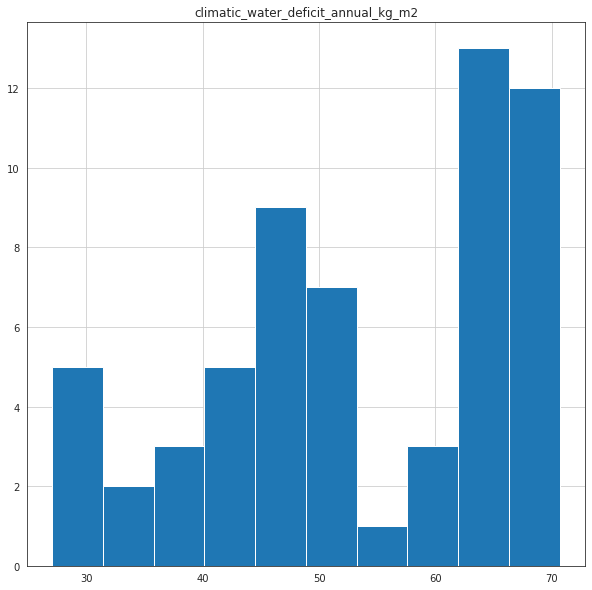

In [238]:
pd.plotting.hist_frame(df_imputted[['climatic_water_deficit_annual_kg_m2']],figsize=(10,10));

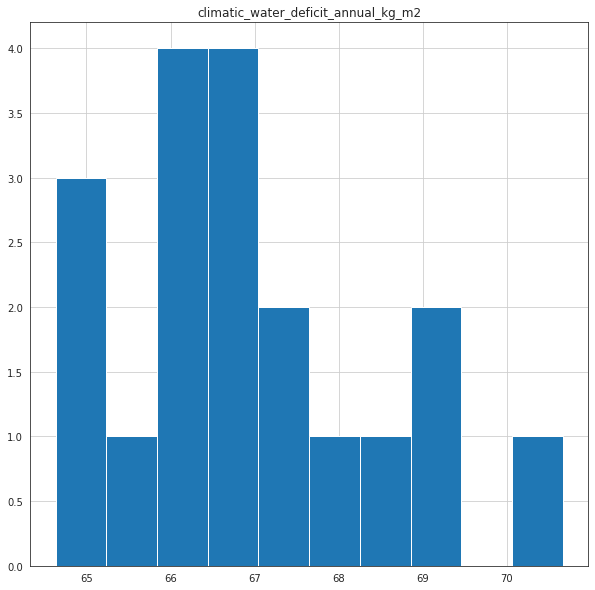

In [239]:
pd.plotting.hist_frame(df_new[['climatic_water_deficit_annual_kg_m2']],figsize=(10,10));

In [240]:
mi = MultipleImputer(return_list=True,strategy='stochastic') # pass through data multiple times
values=mi.fit_transform(df_dropped_na)
df_imputted=values[4][1]

In [243]:
df_new=df.loc[df['year']<=2019]

In [244]:
df_new.isna().any()

year                                                                                             False
population_total                                                                                 False
agricultural_land_sq_km                                                                           True
animals_production_head                                                                           True
cereal_yield_kg_per_hectare                                                                       True
co2_emissions_kt                                                                                  True
transpiration_sum                                                                                 True
evaporation_sum                                                                                   True
eti_sum                                                                                           True
npp_sum                                                                  

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 33 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   year                                                                                           61 non-null     int64  
 1   population_total                                                                               61 non-null     float64
 2   agricultural_land_sq_km                                                                        58 non-null     float64
 3   animals_production_head                                                                        59 non-null     float64
 4   cereal_yield_kg_per_hectare                                                                    58 non-null     float64
 5   co2_emissions_kt        

In [246]:
df_dropped_na=df_new.dropna(axis=1)

In [247]:
df_dropped_na=pd.merge(df_dropped_na,df_new[['year','agricultural_land_sq_km']], how="outer", on=["year"])

In [248]:
df_dropped_na.isna().any()

year                       False
population_total           False
agricultural_land_sq_km     True
dtype: bool

In [249]:
df_dropped_na.shape

(60, 3)

In [250]:
mi = MultipleImputer(return_list=True,strategy='stochastic') # pass through data multiple times
mice = MiceImputer(return_list=True) # pass through data multiple times and iteratively optimize imputations in each column

In [251]:
values=mi.fit_transform(df_dropped_na)

In [252]:
df_imputted=values[4][1]

In [253]:
df_imputted=pd.merge(df_imputted,df_new[['year','animals_production_head']], how="outer", on=["year"])

In [254]:
values=mi.fit_transform(df_imputted)

In [255]:
df_imputted=values[4][1]

In [256]:
df_imputted=pd.merge(df_imputted,df_new[['year','cereal_yield_kg_per_hectare']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [257]:
df_imputted=pd.merge(df_imputted,df_new[['year','co2_emissions_kt']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [258]:
df_imputted=pd.merge(df_imputted,df_new[['year','transpiration_sum']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [259]:
df_imputted=pd.merge(df_imputted,df_new[['year','harvested_area_of_cereal_crops_ha']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [260]:
df_imputted=pd.merge(df_imputted,df_new[['year','cereal_crops_production_ton']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [261]:
df_imputted=pd.merge(df_imputted,df_new[['year','wapor_gross_water_productivity_annual_kg_m3']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [262]:
df_imputted=pd.merge(df_imputted,df_new[['year','potential_evapotranspiration_annual_kg_m2']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [263]:
df_imputted=pd.merge(df_imputted,df_new[['year','methane_emissions_kt_of_co2_equivalent']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [264]:
df_imputted=pd.merge(df_imputted,df_new[['year','climatic_water_deficit_annual_kg_m2']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [265]:
df_imputted=pd.merge(df_imputted,df_new[['year','nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [266]:
df_imputted=pd.merge(df_imputted,df_new[['year','maxtemp_c']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [267]:
df_imputted=pd.merge(df_imputted,df_new[['year','mintemp_c']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [268]:
df_imputted=pd.merge(df_imputted,df_new[['year','rainfall_mm']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [269]:
df_imputted=pd.merge(df_imputted,df_new[['year','_manufacturing_isic_10_33_mio_m3_y']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [270]:
df_imputted=pd.merge(df_imputted,df_new[['year','_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [271]:
df_imputted=pd.merge(df_imputted,df_new[['year','freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [272]:
df_imputted=pd.merge(df_imputted,df_new[['year','wapor_reference_evapotranspiration_annual_mm']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [273]:
df_imputted=pd.merge(df_imputted,df_new[['year','wapor_net_primary_production_annual_g_m2']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [274]:
df_imputted=pd.merge(df_imputted,df_new[['year','level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [275]:
df_imputted=pd.merge(df_imputted,df_new[['year','evaporation_sum']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [276]:
df_imputted=pd.merge(df_imputted,df_new[['year','water_use_efficiency_united_states_dollars_per_cubic_meter']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [277]:
df_imputted=pd.merge(df_imputted,df_new[['year','eti_sum']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [278]:
df_imputted=pd.merge(df_imputted,df_new[['year','npp_sum']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [279]:
df_imputted=pd.merge(df_imputted,df_new[['year','ret_sum']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [280]:
df_imputted=pd.merge(df_imputted,df_new[['year','gwp_mean']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [281]:
df_imputted=pd.merge(df_imputted,df_new[['year','renewable_internal_freshwater_resources_per_capita_cubic_meters']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [282]:
df_imputted=pd.merge(df_imputted,df_new[['year','land_area_equipped_for_irrigation_ha']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

In [283]:
df_imputted=pd.merge(df_imputted,df_new[['year','nile']], how="outer", on=["year"])
values=mi.fit_transform(df_imputted)
df_imputted=values[4][1]

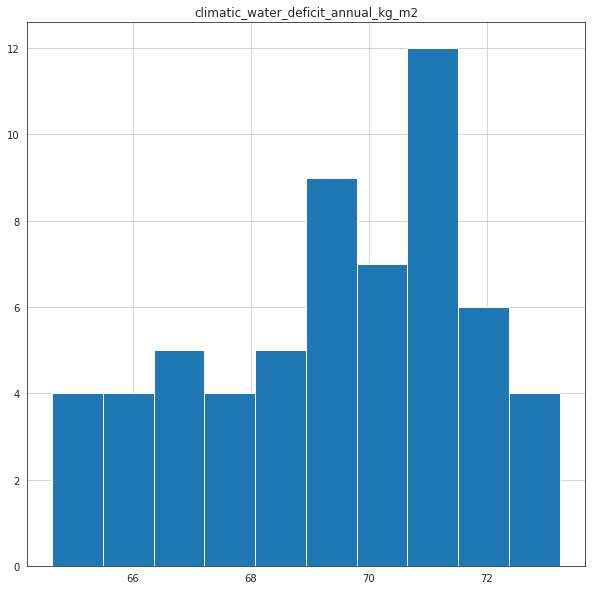

In [284]:
pd.plotting.hist_frame(df_imputted[['climatic_water_deficit_annual_kg_m2']],figsize=(10,10));

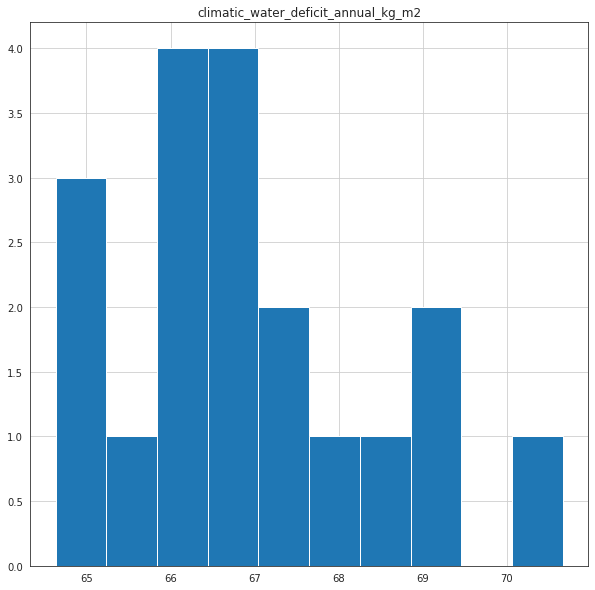

In [285]:
pd.plotting.hist_frame(df_new[['climatic_water_deficit_annual_kg_m2']],figsize=(10,10));

In [286]:
mi = MultipleImputer(return_list=True,strategy='stochastic') # pass through data multiple times
values=mi.fit_transform(df_dropped_na)
df_imputted=values[4][1]